## Loading Data


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width. If we had categorical variables we would encode them.
y = iris.target  # Target: species (0=setosa, 1=versicolor, 2=virginica)


In [2]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=102)

In [ ]:
model2 = DecisionTreeClassifier() #untuned decision tree classifier 
# Train and predict
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)

acc2

0.9333333333333333

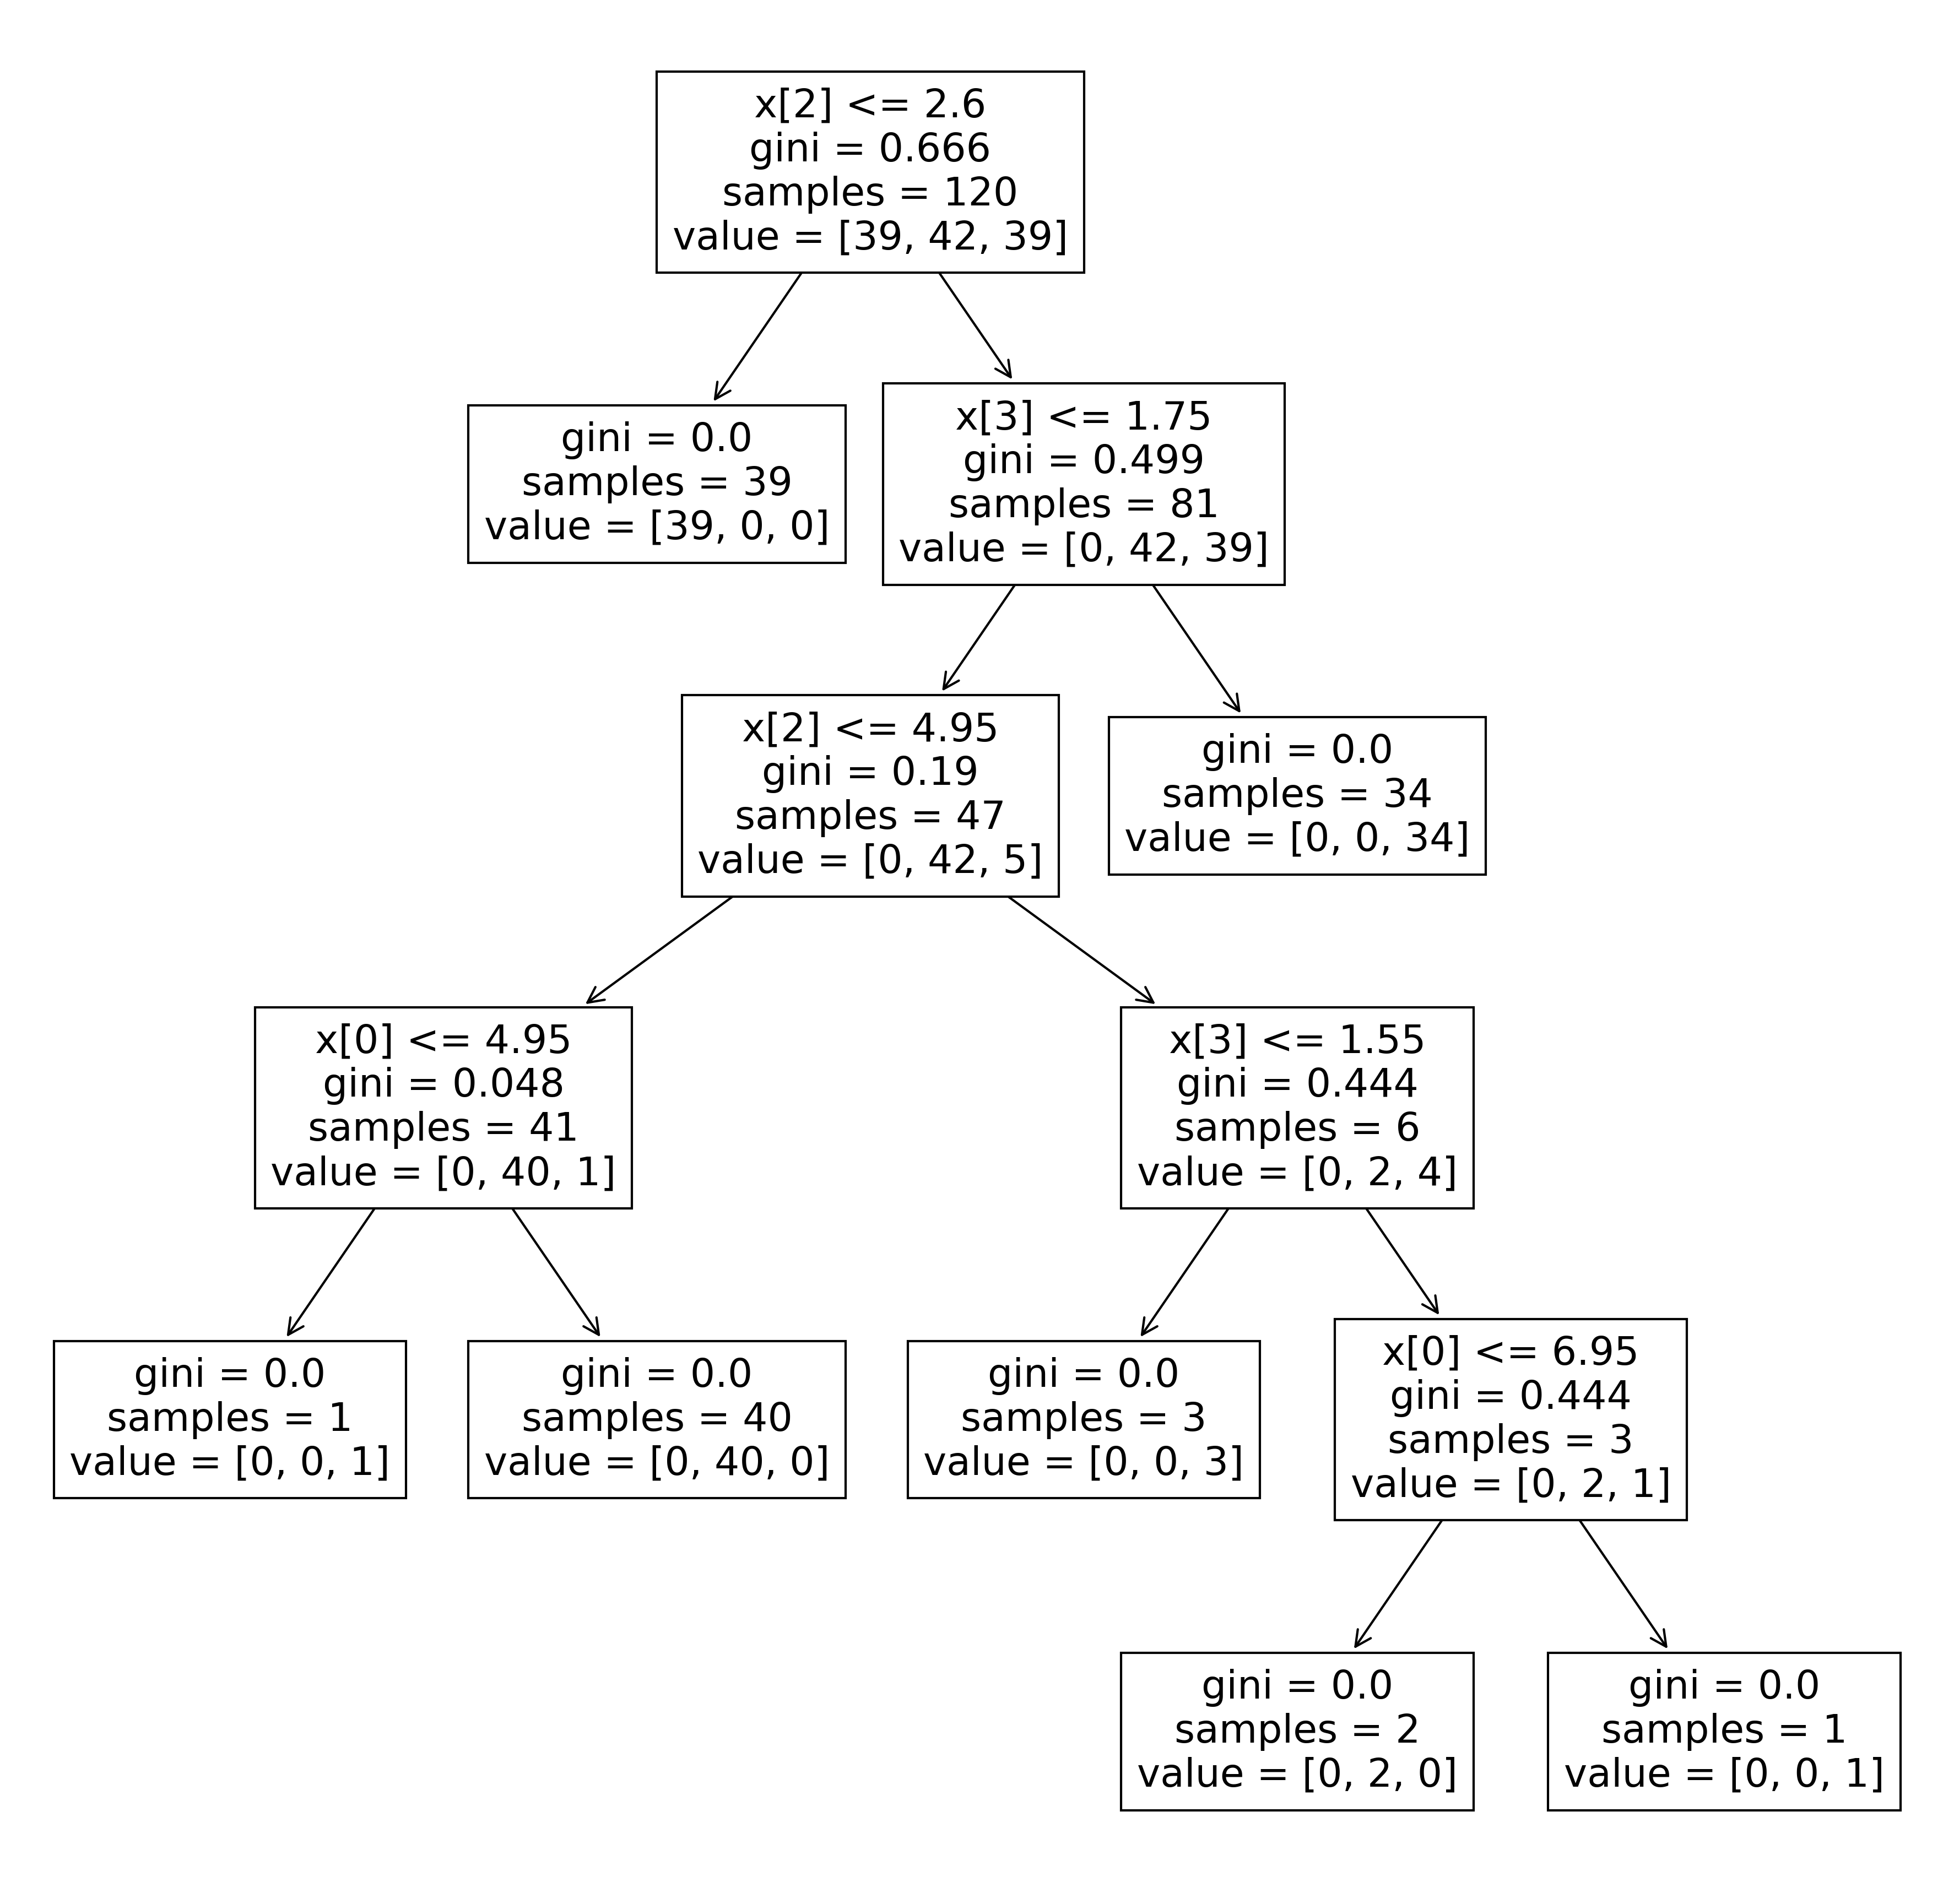

In [10]:
from sklearn.tree import plot_tree
fig,ax = plt.subplots(dpi=300,figsize=(15,15))
plot_tree(model2,ax=ax);

### Defining Hyperparameters

In [5]:
# Hyperparameter combinations to test
max_depth_options = [2, 3, 4]       # Tree depth
min_samples_split_options = [2, 5]  # Minimum samples to split a node
criterion_options = ['gini', 'entropy']  # Split quality measure

### Training Models and Storing Accuracies

In [6]:
# Dictionary to store results: {hyperparameters: accuracy}
results = {}

# Test all combinations manually
for depth in max_depth_options:
    for split in min_samples_split_options:
        for criterion in criterion_options:
            # Create model with current hyperparameters
            model = DecisionTreeClassifier(
                max_depth=depth,
                min_samples_split=split,
                criterion=criterion,
                random_state=42
            )
            # Train and predict
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            
            # Store results with a readable key
            key = f"max_depth={depth}, min_split={split}, criterion={criterion}"
            results[key] = round(acc, 4)  # Round to 4 decimal places



Printing the accuracy results of each model

In [7]:
results

{'max_depth=2, min_split=2, criterion=gini': 0.9667,
 'max_depth=2, min_split=2, criterion=entropy': 0.9667,
 'max_depth=2, min_split=5, criterion=gini': 0.9667,
 'max_depth=2, min_split=5, criterion=entropy': 0.9667,
 'max_depth=3, min_split=2, criterion=gini': 0.9667,
 'max_depth=3, min_split=2, criterion=entropy': 0.9667,
 'max_depth=3, min_split=5, criterion=gini': 0.9667,
 'max_depth=3, min_split=5, criterion=entropy': 0.9667,
 'max_depth=4, min_split=2, criterion=gini': 0.9333,
 'max_depth=4, min_split=2, criterion=entropy': 0.9333,
 'max_depth=4, min_split=5, criterion=gini': 0.9333,
 'max_depth=4, min_split=5, criterion=entropy': 0.9333}

Sorting the accuracies of the models so that we can pick the best one

In [8]:
# Print results sorted by accuracy (best to worst)
print("Accuracy Results:")
for params, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{params}: {acc}")

Accuracy Results:
max_depth=2, min_split=2, criterion=gini: 0.9667
max_depth=2, min_split=2, criterion=entropy: 0.9667
max_depth=2, min_split=5, criterion=gini: 0.9667
max_depth=2, min_split=5, criterion=entropy: 0.9667
max_depth=3, min_split=2, criterion=gini: 0.9667
max_depth=3, min_split=2, criterion=entropy: 0.9667
max_depth=3, min_split=5, criterion=gini: 0.9667
max_depth=3, min_split=5, criterion=entropy: 0.9667
max_depth=4, min_split=2, criterion=gini: 0.9333
max_depth=4, min_split=2, criterion=entropy: 0.9333
max_depth=4, min_split=5, criterion=gini: 0.9333
max_depth=4, min_split=5, criterion=entropy: 0.9333


As we can see above there are several models with 0.9667 accuracies. We can pick any of the parameters for those models to use in our final model